### *Performing Explanatory Data Analysis (EDA) for the Customer's Churn Dataset And Churn prediction*

                                                  The Problem

Churn in business terms refers to as when a client ends a subscription to a service they have been using. An example in context of this project will be when people that subscribes to a particular network plans cancels subscription.

So, basically, Churn Prediction is essentially predicting which clients are most likely to cancel a subscription i.e ‘leave a company’ based on their usage of the service.



                                                  The Objective

The EDA should :
1.   Dig deep to unravel gold in form of insights.
2.   Show Trends and any other information that may be or may not be visible 

The Churn prediction model should:
1. Predict wether a customer will Churn or not with a high accuracy.
2. Generalize well to unseen data


In [141]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Lets start with some EDA

In [142]:
data = pd.read_csv("Customer Churn.csv",sep=',')
data.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [143]:
# Check data types and null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [144]:
data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [145]:
data.shape

(3150, 14)

In [146]:
# Some stats about the data
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [147]:
# As seen before there is no null values
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

<img src ="Gifs/ZERO.gif">

In [148]:
# renaming columns ( just added _  in composed names)
data.columns = ['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_Sms',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status', 'Age',
       'Customer_Value','Churn']

data.head()

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Age,Customer_Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [149]:
# Let's check the class distribution
data['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Churn Customers')

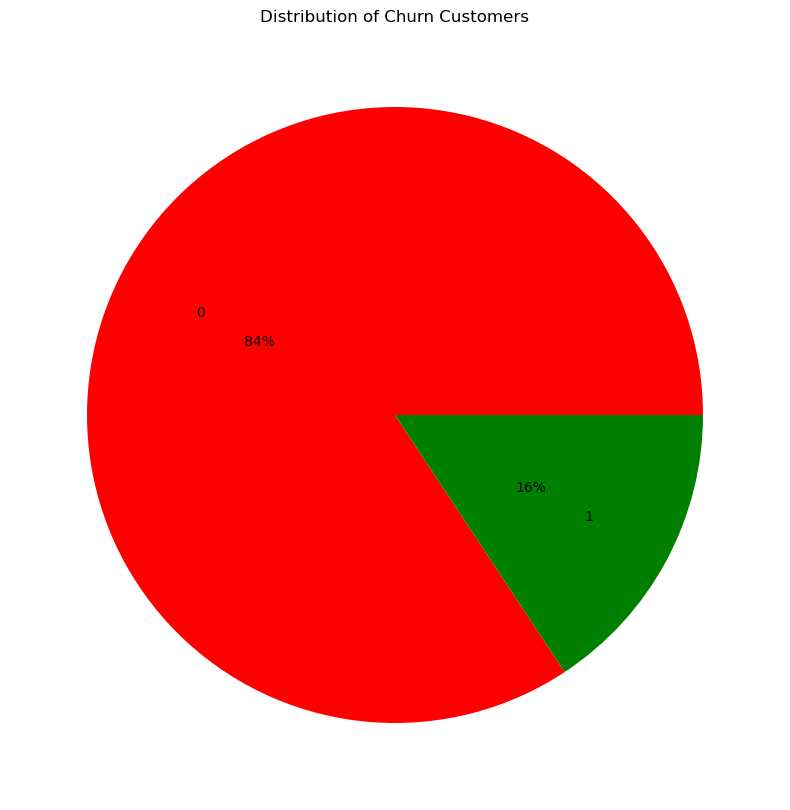

In [150]:
plt.figure(figsize=(10,10))
plt.pie(x=[2655, 495], labels=['0','1'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['r','g'])
plt.title('Distribution of Churn Customers')

***From the plot above we can see that 84% of the customers will not churn at the end of the year while 16% of them will eventually do it***

**It also shows that the classes are unbalanced with a huge portion of the data belonging to the 0 class ( the no chun class)**


<img src="Gifs/unbalanced.gif">

#### Now lets take a look into some correlation

<Axes: >

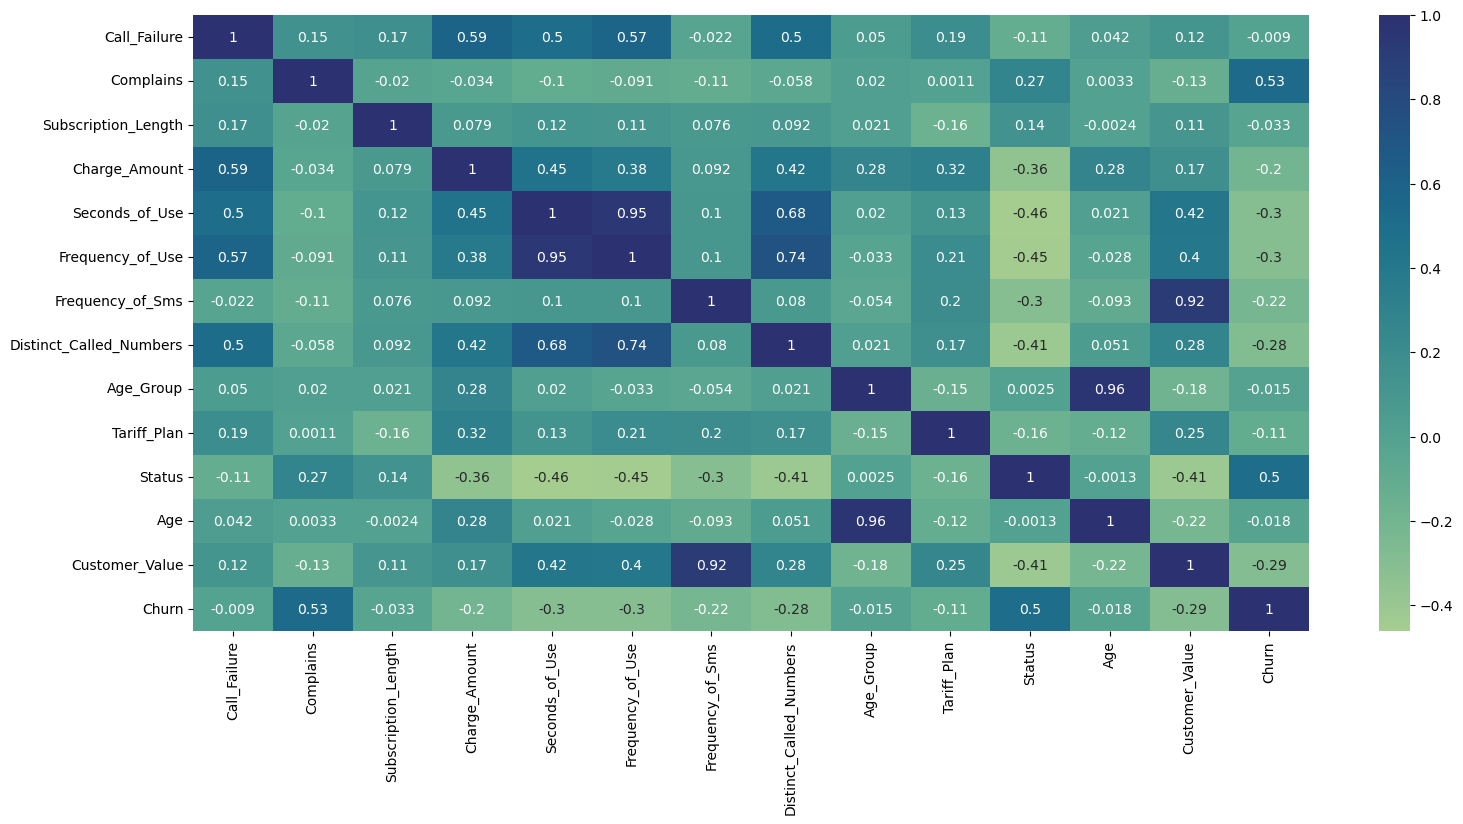

In [151]:
corr = data.corr()
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot = True, cmap='crest')

**It looks like there is many features who are correlated with each other, one that stands out is "Customer_Value" with "Frequency_of_sms" and "Seconds_of_use" with "Frequency_of_use".**

**Interesting... I will take into account when I'll get to model Building**

<img src="Gifs/thinking.gif">

#### Lets plot some barplots to check for any pattern between the features and the target (Churn column)

Since the Churn target variable is a binary output (0 or 1) plotting it against other features using scatter plots wont help much. Instead, its better to use Barplots in this case.

Also since most of the features have a wide range of values its a good idea to use bins when plotting so the visualization is actually readable, otherwise we wont be able to get much info from the plots.

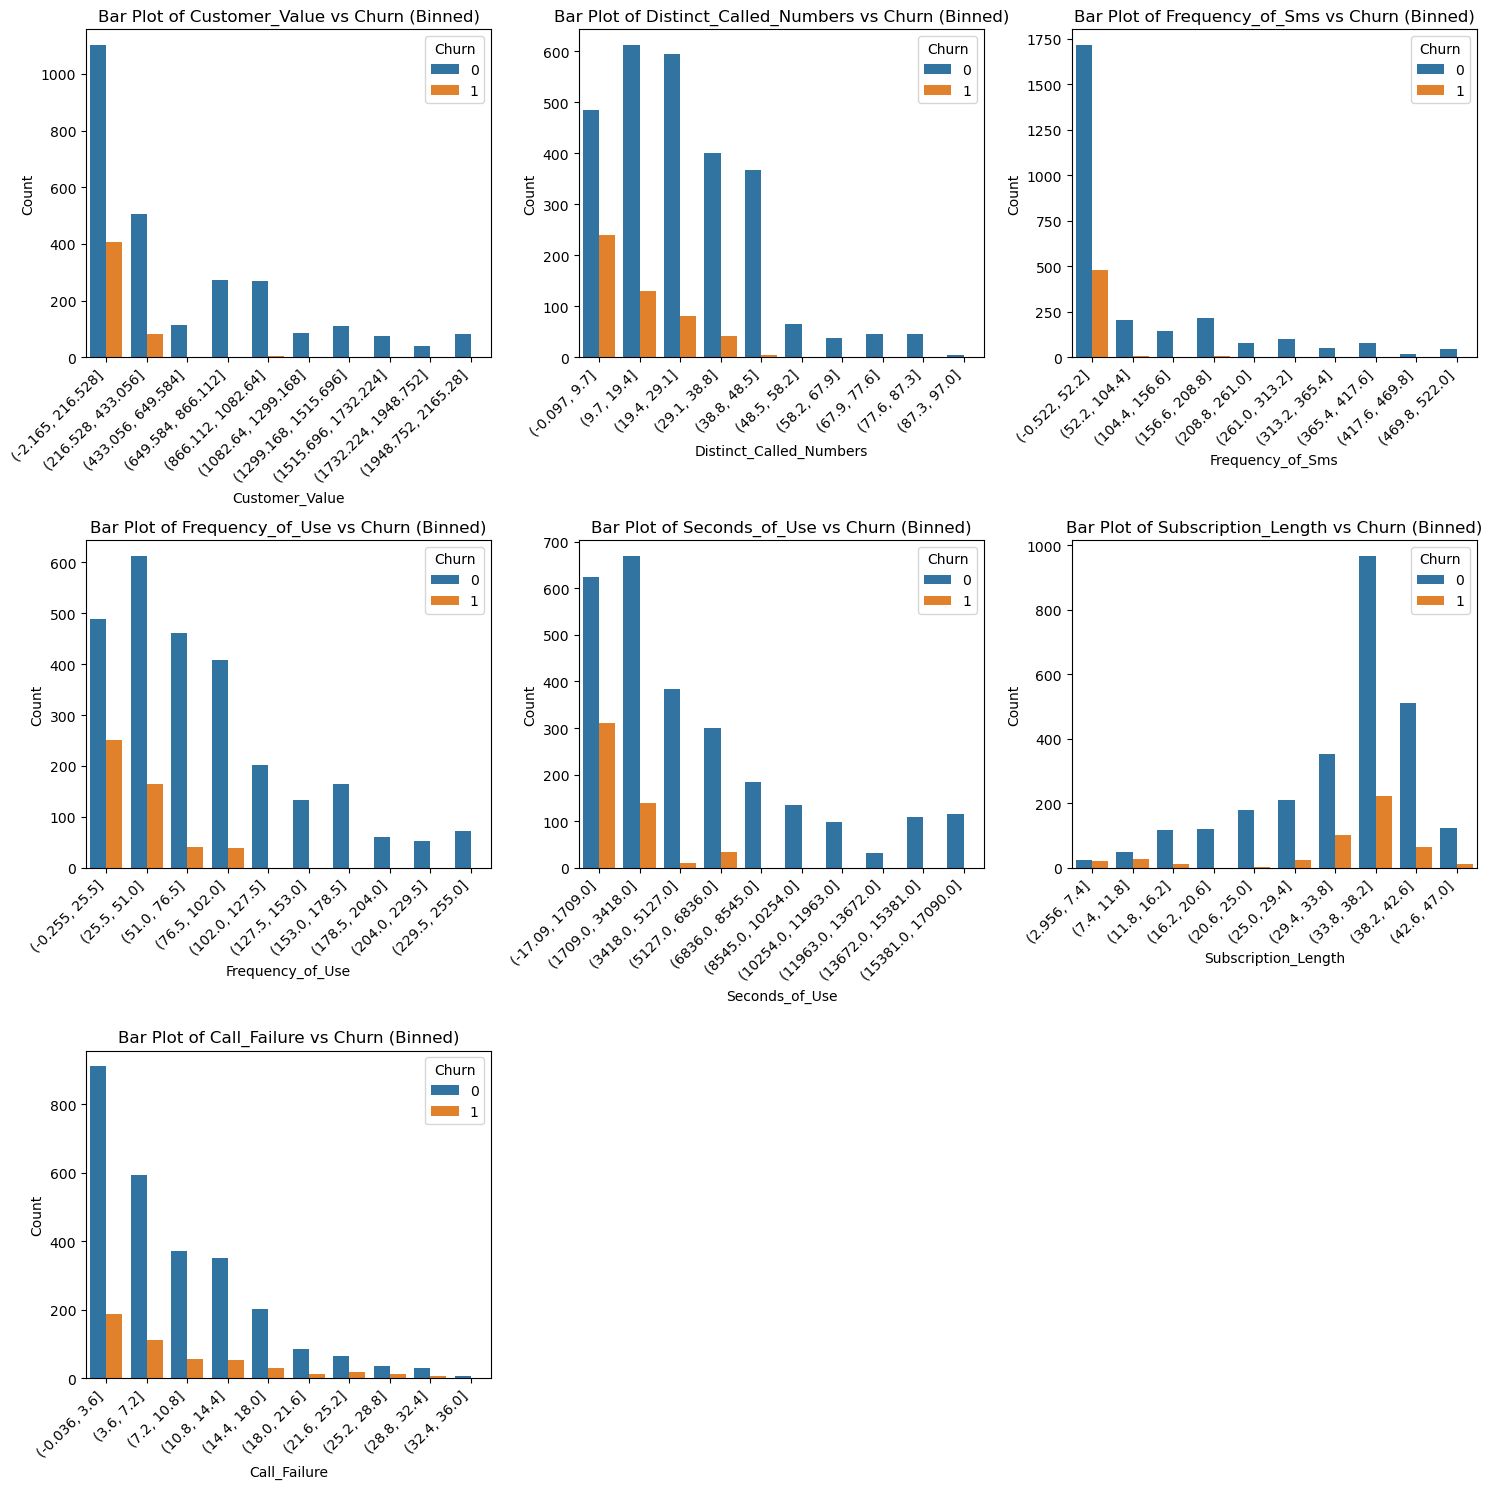

In [152]:

# Define the columns that need bins
columns_to_plot = ['Customer_Value', 'Distinct_Called_Numbers', 'Frequency_of_Sms', 'Frequency_of_Use', 'Seconds_of_Use', 'Subscription_Length', 'Call_Failure']

# Define the number of bins for each column
num_bins = 10

# Determine the number of columns per row
cols_per_row = 3

# Calculate the number of rows required
num_rows = (len(columns_to_plot) + cols_per_row - 1) // cols_per_row

# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

for i, column in enumerate(columns_to_plot):
    row_index = i // cols_per_row
    col_index = i % cols_per_row
    ax = axes[row_index, col_index]

    binned_data = pd.cut(data[column], bins=num_bins)
    sns.countplot(x=binned_data, hue='Churn', data=data, ax=ax)
    ax.set_title(f'Bar Plot of {column} vs Churn (Binned)')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any empty subplots
if len(columns_to_plot) < num_rows * cols_per_row:
    for i in range(len(columns_to_plot), num_rows * cols_per_row):
        fig.delaxes(axes[i // cols_per_row, i % cols_per_row])

plt.tight_layout()
plt.show()


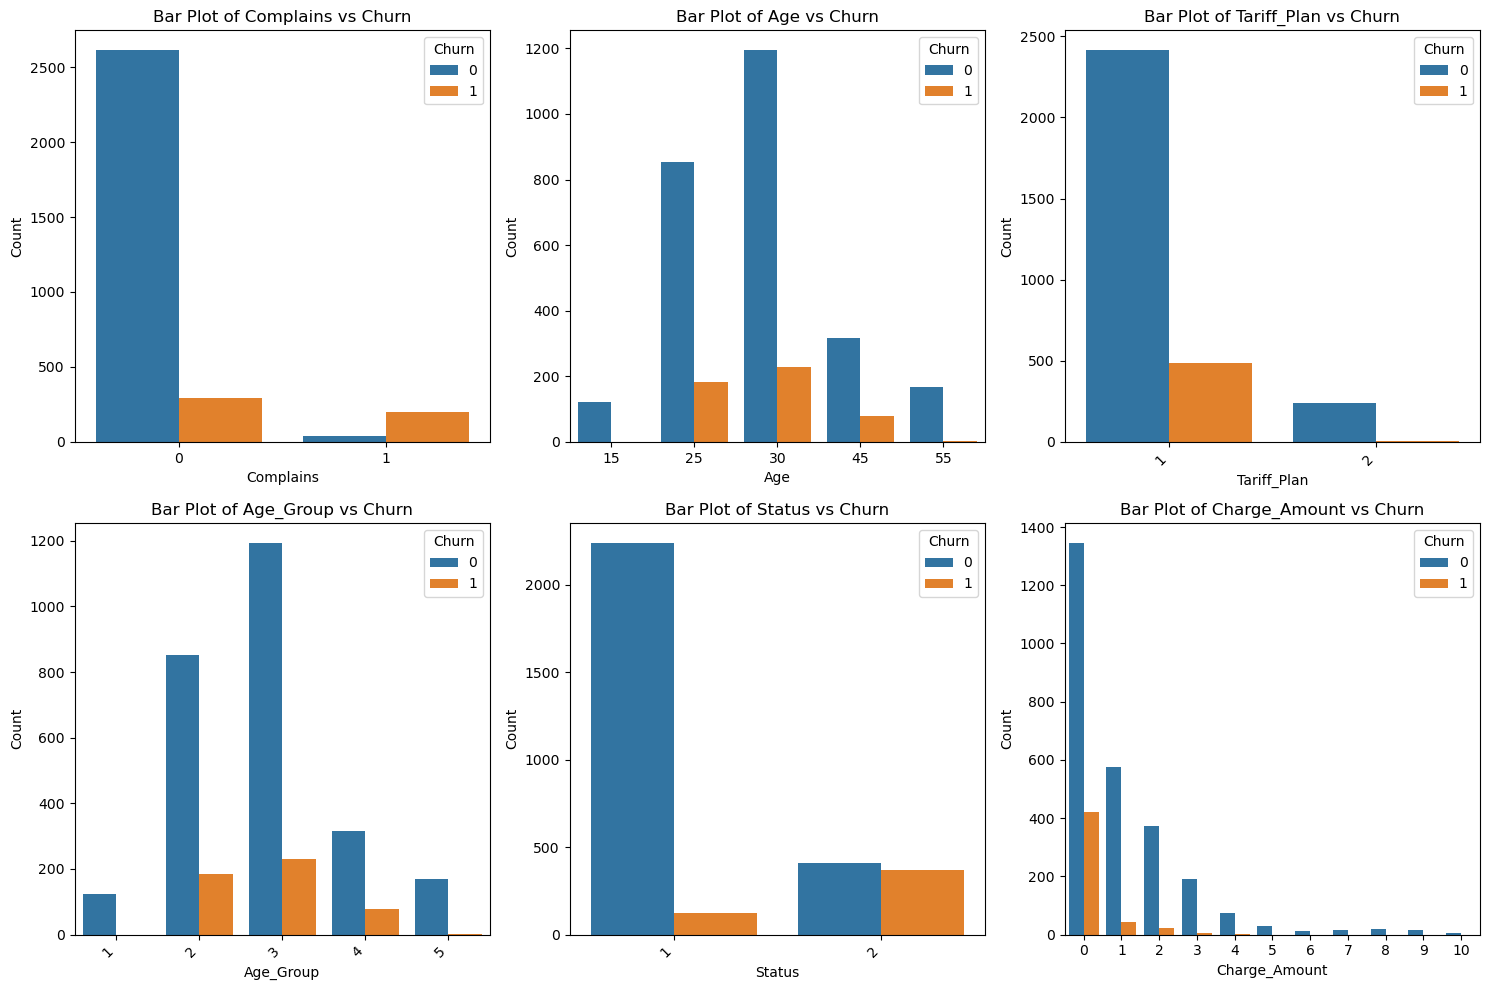

In [153]:


# Define the columns that don't need bins
no_bins_cols = ["Complains", "Age", "Tariff_Plan", "Age_Group", "Status", 'Charge_Amount']

# Determine the number of columns per row
cols_per_row = 3

# Calculate the number of rows required
num_rows = (len(no_bins_cols) + cols_per_row - 1) // cols_per_row

# Create subplots with a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 5 * num_rows))

for i, column in enumerate(no_bins_cols):
    row_index = i // cols_per_row
    col_index = i % cols_per_row
    ax = axes[row_index, col_index]

    sns.countplot(x=column, hue='Churn', data=data, ax=ax)
    ax.set_title(f'Bar Plot of {column} vs Churn')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

    # Rotate x-labels for better readability if needed
    if column in ['Tariff_Plan', 'Age_Group', 'Status']:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Remove any empty subplots
if len(no_bins_cols) < num_rows * cols_per_row:
    for i in range(len(no_bins_cols), num_rows * cols_per_row):
        fig.delaxes(axes[i // cols_per_row, i % cols_per_row])

plt.tight_layout()
plt.show()


### From the Barplots we just plotted we can get some interesting info, mainly :
* It looks like customers with lowest "customer_value" are more prone to churn at the end of the year
* Customers who have lower numbers of "distinc_calls" are also more likely to churn.
* Customers who have a lower "frequency_of_sms" are once more also likely to churn
* Also the more months a customers subscribe for the more likely it is for him to churn (peaking at between 33.8 and 38.2 months of subscription)
* One counterintuitive result is that for some reason the more "call_failurs" a customer has the less he is likely to churn.... 
* The age of the customers who churn is mostly between 25 and 45 years old (may be customers who are too young or too old dont want to go through the hassle of canceling a subscription)
* The tariff plan that is found in the majority of the customers who churn is the "pay as you go tariff plan "1"
* customers with the lowest charge amount  are more likely to churn


**Anyway, We did enough of data exploration. Let's start doing the Fun stuff**

<img src="Gifs/fun.gif">

# Lets start the machine learning part of this project

## To Churn or not to Churn

<img src="Gifs/tochurn.gif">

As said before, the target variable we want to predict is the Churn and since its value is either 0 or 1 then our prediction task will obviously be interpreted as a binary classification problem.

We will test few models and pick the best one.

We will test namely : 
* Logistic regression 
* XGBoost
* SVM

But before that Lets do some data preprocessing to prepare the data for training

In [154]:
data.head()

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Age,Customer_Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


Lets drop the Age column since we already have Age_Group column

In [155]:
data.drop(columns=["Age"], inplace=True)

We only need to standarize a subset of the columns since the other columns represent categories.
Also since the data set contains only numerical numbers and has already encoded lables we don have to do label encoding. We just have to standarize the subset of features

In [156]:
from sklearn.discriminant_analysis import StandardScaler

# Specifies the features to standardize
features_to_standardize = ["Customer_Value", "Frequency_of_Sms", "Frequency_of_Use", "Seconds_of_Use", "Subscription_Length", "Call_Failure","Distinct_Called_Numbers"]

scaler = StandardScaler()

data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

In [157]:
data.head()

,Call_Failure,Complains,Subscription_Length,Charge_Amount,Seconds_of_Use,Frequency_of_Use,Frequency_of_Sms,Distinct_Called_Numbers,Age_Group,Tariff_Plan,Status,Customer_Value,Churn
0,0.051229,0,0.636726,0,-0.024411,0.026816,-0.607513,-0.378158,3,1,1,-0.528759,0
1,-1.050285,0,0.753384,0,-0.989807,-1.122926,-0.589691,-1.133331,2,1,2,-0.822036,0
2,0.326608,0,0.520069,0,-0.481140,-0.164807,2.547012,0.028473,3,1,1,2.061285,0
3,0.326608,0,0.636726,0,-0.065390,-0.060285,-0.643157,0.667466,1,1,1,-0.446775,0
4,-0.637217,0,0.636726,0,-0.495435,-0.199648,-0.634246,0.551285,1,1,1,-0.629033,0


#### Lets now set up our training and test data

In [158]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
X.columns

Index(['Call_Failure', 'Complains', 'Subscription_Length', 'Charge_Amount',
       'Seconds_of_Use', 'Frequency_of_Use', 'Frequency_of_Sms',
       'Distinct_Called_Numbers', 'Age_Group', 'Tariff_Plan', 'Status',
       'Customer_Value'],
      dtype='object')

#### Logistic Regression (Hyper Tuned):

In [159]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear'],  # Solver for logistic regression
}

# Create a grid search instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [160]:
# Train a new model with the best hyperparameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy with Best Model: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy with Best Model: 0.88
Confusion Matrix:
[[513   7]
 [ 68  42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       520
           1       0.86      0.38      0.53       110

    accuracy                           0.88       630
   macro avg       0.87      0.68      0.73       630
weighted avg       0.88      0.88      0.86       630



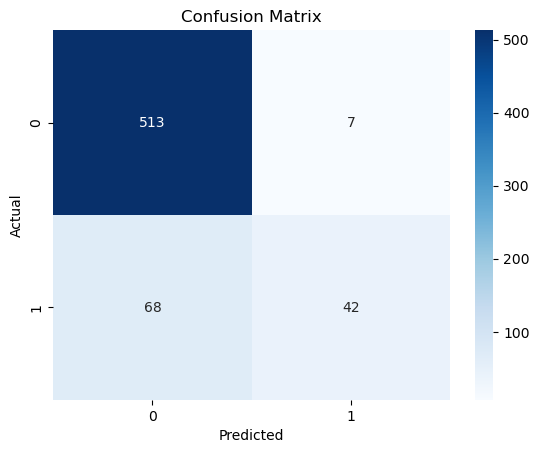

In [161]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

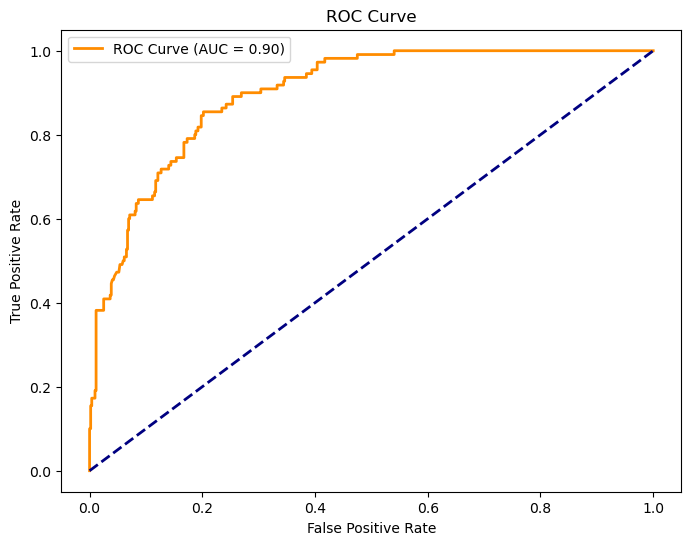

In [162]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


**The model has a high accuracy and does well in correctly classifying non-churn instances (class 0), but it has lower recall and F1-score for churn instances (class 1). This shows that the class unbalance i talked about previously does have an impact on this model.**

**Still the model has a good AUC of 0.90  it shows excellent performance in distinguishing between the two classes.**

### Lets try XGboost (Hyper tuned) :


In [163]:
import xgboost as xgb

model = xgb.XGBClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


In [164]:
# Train a new model with the best hyperparameters
best_model = xgb.XGBClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

#Save the model to use with the api
best_model.save_model("XGboost_Model.model")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [165]:
print(f"Accuracy with Best Model: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy with Best Model: 0.94
Confusion Matrix:
[[508  12]
 [ 26  84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       520
           1       0.88      0.76      0.82       110

    accuracy                           0.94       630
   macro avg       0.91      0.87      0.89       630
weighted avg       0.94      0.94      0.94       630



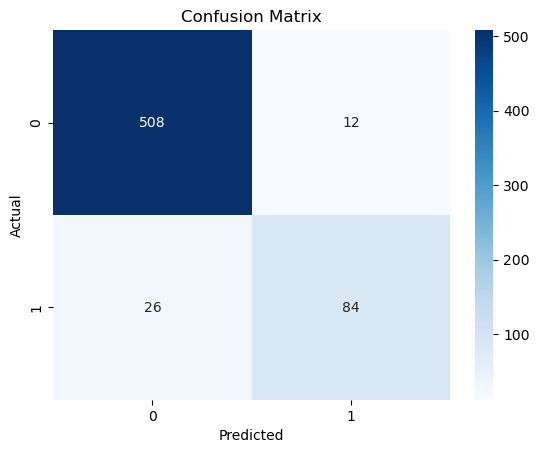

In [166]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

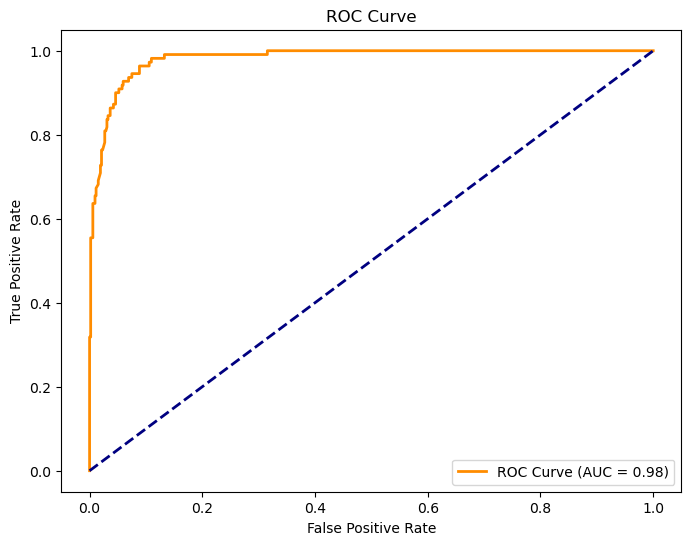

In [167]:
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Well! Well! Well!**


**It seems like our XGboost model performs exceptionally well, especially in correctly classifying non-churn instances (class 0). It also does a good job with churn instances (class 1).**

**With an accuracy of 94% and an AUC of 0.98 it shows that its very good at classifying both classes even though there is a class unbalanced which is obvious since Ensemble methods, such as Random Forest and Gradient Boosting (including XGBoost), can handle class imbalance reasonably well, making them a good choice for imbalanced datasets.**

<img src="Gifs/yeah.gif">

### Lastly Lets also try SVM just for Fun :

In [168]:
# Create an SVM classifier
from sklearn.svm import SVC


model = SVC()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
}

# Create a grid search instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 10, 'kernel': 'rbf'}


In [169]:
best_model = SVC(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [170]:
print(f"Accuracy with Best Model: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy with Best Model: 0.92
Confusion Matrix:
[[512   8]
 [ 44  66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       520
           1       0.89      0.60      0.72       110

    accuracy                           0.92       630
   macro avg       0.91      0.79      0.83       630
weighted avg       0.92      0.92      0.91       630



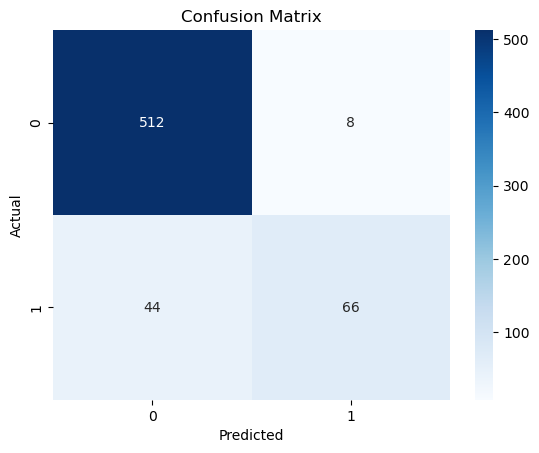

In [171]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

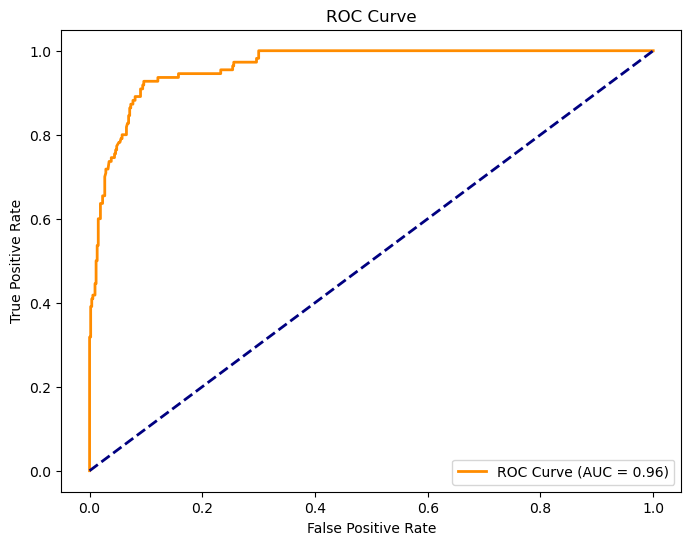

In [172]:
# For SVM, we obtain the decision function scores instead of probabilities
decision_function_scores = best_model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, decision_function_scores)
roc_auc = roc_auc_score(y_test, decision_function_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**The SVM model did Also really well and better than the Logistic regression model. Its a little better than the Logistic model when it comes to correctly classifying the class 1 but it does not compare to the XGboost model**

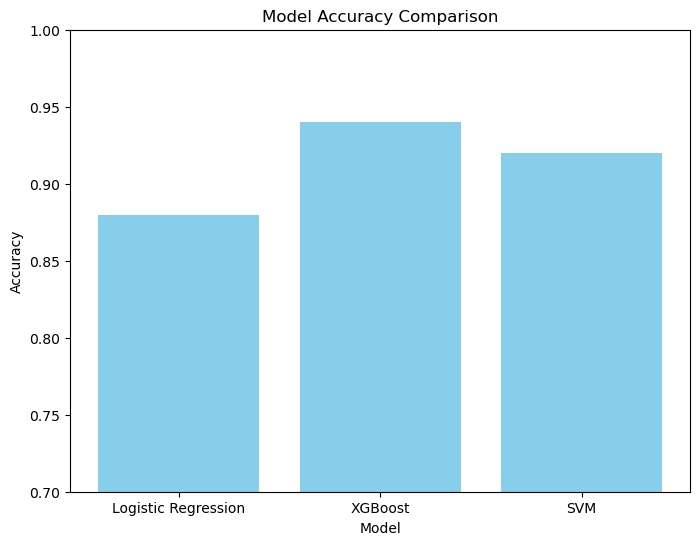

In [173]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'XGBoost', 'SVM']
accuracy = [0.88, 0.94, 0.92]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 1.0)
plt.show()


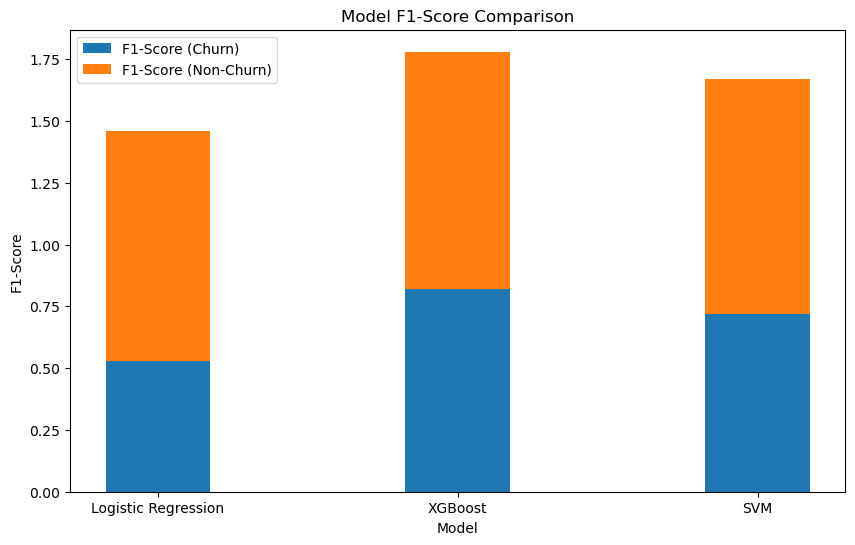

In [174]:
f1_churn = [0.53, 0.82, 0.72]
f1_non_churn = [0.93, 0.96, 0.95]

plt.figure(figsize=(10, 6))
width = 0.35
x = range(len(models))
plt.bar(x, f1_churn, width, label='F1-Score (Churn)')
plt.bar(x, f1_non_churn, width, label='F1-Score (Non-Churn)', bottom=f1_churn)
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Model F1-Score Comparison')
plt.xticks(x, models)
plt.legend()
plt.show()


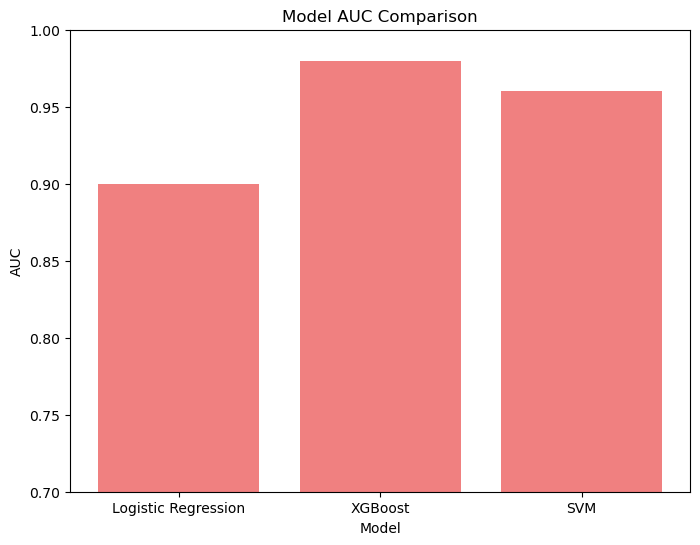

In [175]:
auc = [0.90, 0.98, 0.96]

plt.figure(figsize=(8, 6))
plt.bar(models, auc, color='lightcoral')
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('Model AUC Comparison')
plt.ylim(0.7, 1.0)
plt.show()


In [140]:
# Results for Logistic Regression
lr_results = {
    'Model': ['Logistic Regression'],
    'Accuracy': [0.88],
    'AUC': [0.90],
    'F1-Score (Churn)': [0.53],
    'F1-Score (Non-Churn)': [0.93]
}

# Results for XGBoost
xgb_results = {
    'Model': ['XGBoost'],
    'Accuracy': [0.94],
    'AUC': [0.98],
    'F1-Score (Churn)': [0.82],
    'F1-Score (Non-Churn)': [0.96]
}

# Results for SVM
svm_results = {
    'Model': ['SVM'],
    'Accuracy': [0.92],
    'AUC': [0.96],
    'F1-Score (Churn)': [0.72],
    'F1-Score (Non-Churn)': [0.95]
}

# Create DataFrames
lr_df = pd.DataFrame(lr_results)
xgb_df = pd.DataFrame(xgb_results)
svm_df = pd.DataFrame(svm_results)

# Concatenate DataFrames
comparison_table = pd.concat([lr_df, xgb_df, svm_df])

# Reset index
comparison_table.reset_index(drop=True, inplace=True)


print(comparison_table)

                 Model  Accuracy   AUC  F1-Score (Churn)  F1-Score (Non-Churn)
0  Logistic Regression      0.88  0.90              0.53                  0.93
1              XGBoost      0.94  0.98              0.82                  0.96
2                  SVM      0.92  0.96              0.72                  0.95


|       Model           | Accuracy |   AUC  | F1-Score (Churn) | F1-Score (Non-Churn) |
|-----------------------|----------|-------|-------------------|-----------------------|
| Logistic Regression   |   0.88   |  0.90 |       0.53        |        0.93           |
| XGBoost               |   0.94   |  0.98 |       0.82        |        0.96           |
| SVM                   |   0.92   |  0.96 |       0.72        |        0.95           |

**Conclusion:**

In this notebook, we explored and compared three different models for binary classification: Logistic Regression, XGBoost, and Support Vector Machine (SVM). Here's a summary of our findings:

- XGBoost demonstrated the highest accuracy of 0.94, with an AUC of 0.98, and performed well in terms of F1-scores for both churn and non-churn classes.

- SVM achieved an accuracy of 0.92 and showed a good balance between precision and recall, with F1-scores of 0.72 for churn and 0.95 for non-churn.

- Logistic Regression, while having the lowest accuracy of 0.88, still provided reasonable performance with an AUC of 0.90.

XGBoost excelled in terms of accuracy and AUC, while SVM demonstrated robust performance with a good balance between precision and recall.




# Flask Api

**Run the cell below to launch the Api.py file then connect to http://127.0.0.1:5000/**

**Here is a link to see what the fields represent : https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset**

In [195]:
!python Api.py

^C
